## 1 算法简介

线性回归是⼀种 **「监督学习」(superviesed learning)** 算法，即给定⼀个训练集，去学习⼀个假设函数，⽤来尽量精确地预测每个样本对应的输出。从输出变量的离散程度来看，监督学习算法可以分为两类。线性回归属于回归算法，其输出变量 **「连续」** ；而另⼀类监督学习算法是分类算法，其输出变量离散。

线性回归的假设函数为：

$$h_{\theta}(x)=\sum_{i=1}^n \theta_i x_i = \theta^T x$$

线性回归的代价函数为：

$$J(\theta)=\frac{1}{2}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2$$

$m$个样本，每个样本有$n$个特征。

线性回归的学习目标：通过训练集找出使代价函数最小的一组参数$\theta$（又称最小二乘法LMS algorithm(least mean squares)）.

## 2 求解方法

对于线性回归代价函数的求解，有两种可选⽅法：**「梯度下降」(gradient descent)** 与 **「正规方程」(normal equations)** 。

### 2.1 梯度下降

梯度下降是⼀种求解最优化问题的迭代⽅法，具体步骤为：

1. 随机选取初始的 $\theta$

2. 不断地以梯度的方向修正 $\theta$

3. 最终使$J(\theta)$收敛至局部最优（在最小二乘中，局部最优即全局最优）

$$\theta_j:= \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

$\alpha$称为学习率(learning rate)，太小会导致收敛缓慢，太大会导致错过最优点，需要谨慎选择。

对公式进一步推导（假设只有一个样本点），得到：

$$\frac{\partial}{\partial \theta_j}J(\theta)=\frac{\partial}{\partial \theta_j} \frac{1}{2}(h_{\theta}(x)-y)^2$$

$$=(h_{\theta}(x)-y)\cdot \frac{\partial}{\partial \theta_j}(\sum_{i=0}^n \theta_i x_i - y)$$

$$=(h_{\theta}(x) - y)x_j$$

将上述结果代回公式得到：

$$\theta_j:=\theta_j + \alpha (y^{(i)}-h_{\theta}(x^{(i)})) x_j^{(i)}$$

注意公式中通过数学变换将减号变成了加号， 方便之后与逻辑回归的结果作比较.

#### 2.1.1 分类

梯度下降主要可以分为两类：**「批量梯度下降(Batch gradient descent)」** 和 **「随机梯度下降」(Stochastic gradient descent)：

* 批量梯度下降：每次计算梯度都需要遍历所有的样本点，当样本量很大时， 计算速度会十分缓慢

* 随机梯度下降：每次只考虑⼀个样本点，而不是所有样本点，计算速度会提高， 但是收敛过程会比较曲折， 可能无法精确收敛至最优值

随机梯度下降的一种优化形式是 **「⼩批量梯度下降(Mini-batch gradient descent)」**，利用矩阵**并行运算**，一次处理小批量的样本点，有时可以比随机梯度下降速度更快。

#### 2.1.2 梯度方向的选择

选择梯度⽅向的原因是它是使代价函数减小（下降）最大的方向，我们可以利用柯西不等式对这一结论进行证明：

当 $\theta$ 改变一个很小的量时，利用泰勒公式，忽略一阶导数之后的项，得：

$$\Delta J \approx \frac{\partial J}{\partial \theta_0} \Delta \theta_0 + \frac{\partial J}{\partial \theta_1} \Delta \theta_1+...+\frac{\partial J}{\partial \theta_n} \Delta \theta_n$$

定义如下变量：

$$\Delta \theta = (\Delta \theta_0,\Delta \theta_1,...\Delta \theta_n)^T$$

$$\triangledown J = (\frac{\partial J}{\partial \theta_0},\frac{\partial J}{\partial \theta_1},...,\frac{\partial J}{\partial \theta_n})^T$$

将其代回上式，得:

$$\Delta J \approx \triangledown J \cdot \Delta \theta$$

根据柯西不等式，有（等号当且仅当 $\Delta \theta$ 与$\triangledown J$ 线性相关时成立）：

$$|\Delta J| \approx |\triangledown J \cdot \Delta \theta| \leq \parallel \triangledown J \parallel \cdot \parallel \Delta \theta \parallel $$

因此，要使 $\Delta J$最小，即$|\Delta J|$ 最大且$\Delta J < 0$，而当且仅当$\Delta \theta = -\alpha \triangledown J(\alpha > 0)$时满足条件，即沿着梯度方向调整$\theta$。

#### 2.1.3 梯度向量的几何意义

函数变化增量最快的地方。

### 2.2 正规方程

我们可以通过 **「正规方程」** 直接求出 $\theta$ 的解析解。推导过程如下：

#### 2.2.1 矩阵导数

对一个将$m \times n$ 的矩阵映射至实数的函数，定义其导数为：

$$\triangledown_A f(A) = \left[
\begin{matrix}
 \frac{\partial f}{\partial A_{11}}   & \cdots & \frac{\partial f}{\partial A_{1n}}     \\
 \vdots  & \ddots & \vdots \\
 \frac{\partial f}{\partial A_{m1}}    & \cdots & \frac{\partial f}{\partial A_{mn}}    \\
\end{matrix}
\right]$$

对一个$n \times n$方阵，它的 **「迹」** 定义为 **「对角线元素之和」**：

$$trA = \sum_{i=1}^n A_{ii}$$

易证明迹操作具有如下性质（各矩阵为⽅阵）：

$$trAB = trBA$$

$$trABC = trBCA = trCAB$$

$$trABCD = trBCDA = trCDAB = tr DABC$$

同样易证明如下性质($a$为实数）：

$$trA = trA^T$$

$$tr(A+B)=trA + trB$$

$$traA = atrA$$

基于以上定义，可以证明一些关于矩阵导数的性质（最后一个等式只针对非奇异矩阵）：

$$\triangledown_A trAB = B^T$$

$$\triangledown_{A^T} f(A) = (\triangledown_A f(A))^T$$

$$\triangledown_A trABA^T C = CAB + C^T A B^T$$

$$\triangledown_A|A|=|A|(A^{-1})^T$$

#### 2.2.2 最小二乘重现

对于训练集，可以写成如下的形式：

$$
 X = \left[
 \begin{matrix}
   (x^{(1)})^T  \\
   (x^{(2)})^T  \\
   \vdots \\
   (x^{(m)})^T
  \end{matrix}
  \right] ,
 \vec y=\left[
 \begin{matrix}
   (y^{(1)})  \\
   (y^{(2)})  \\
   \vdots \\
   (y^{(m)})
  \end{matrix}
  \right] $$

因为$h_{\theta}(x^{(i)})=(x^{(i)})^T \theta$，我们可以得出：

$$
 X\theta - \vec y = \left[
 \begin{matrix}
   (x^{(1)})^T  \\
   (x^{(2)})^T  \\
   \vdots \\
   (x^{(m)})^T
  \end{matrix}
  \right] -
 \left[
 \begin{matrix}
   (y^{(1)})  \\
   (y^{(2)})  \\
   \vdots \\
   (y^{(m)})
  \end{matrix}
  \right] = 
  \left[
 \begin{matrix}
   h_{\theta}(x^{(1)})-y^{(1)}  \\
   h_{\theta}(x^{(2)})-y^{(2)}  \\
   \vdots \\
   h_{\theta}(x^{(m)})-y^{(m)} 
  \end{matrix}
  \right] $$

此外，对于一个向量$z$，我们有$z^T z = \sum_i z_i^2$，因此综上可以得出：

$$\frac{1}{2}(X\theta-\vec y)^T (X\theta- \vec y)=\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2 = J(\theta)$$

所以为了使$J(\theta)$最小，即只需找出其导数为 0 时 $\theta$ 的值。下面给出详细的求解过程：

首先，基于矩阵导数的性质，进行如下推导：

$$\triangledown_{A^T} f(A) = (\triangledown_A f(A))^T$$

$$\triangledown_A trABA^T C = CAB + C^T A B^T$$

$$\triangledown_{A^T} trABA^T C = (CAB + C^T A B^T)^T=(CAB)^T+(C^TAB^T)^T=B^T A^T C^T+BA^T C$$

基于以上所述，有:

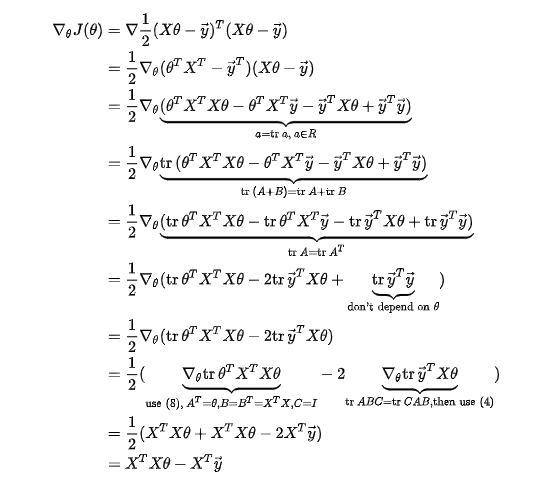

因此，正规方程如下：

$$X^T X \theta = X^T \vec y$$
$$\theta = (X^T X)^{-1}X^T \vec y$$

#### 2.2.3 最小二乘法的局限性和试用场景

1. 最小二乘法需要计算$X^T X$的逆矩阵，有可能逆矩阵不存在，这样就没办法使用最小二乘法，但此时梯度下降法仍能使用，当然我们可以对样本数据进行整理去掉冗余特征，使得$X^T X$的行列式不为0，然后继续使用最小二乘法（正规方程）。

2. 当样本特征$n$特别大时，计算$X^T X$的逆矩阵是非常耗时的$(n \times n)$ 矩阵，甚至不可行，但此时梯度下降法仍可用。那么$n$多大时不适合最小二乘法呢？
    
    如果没有很多分布式大数据计算资源，建议超过10000个特征就用迭代法，或者通过主成分分析降低特征维度后再使用最小二乘法。
    
3. 如果拟合的函数不是线性的则不能使用最小二乘法，需要通过一些技巧转换为线性才可以。此时梯度下降法仍可以使用

4. 讲一些特殊情况，当样本量$m$很少时，少于特征数$n$的时候，这时候拟合方程为欠定的，常用的优化算法都无法拟合数据；当样本量$m$等于特征数$n$的时候，用方程组求解就可以；当样本量$m$大于特征数$n$的时候，拟合方程是超定的，也就是我们常说的最小二乘法。

注意：不可逆问题可以通过伪逆计算或正则化处理解决。

### 3 概率解释

在线性回归中，为什么要选择最小二乘函数作为代价函数？我们可以用 **「概率模型」** 来对其进行解释。

#### 3.1 概率模型

假设真实值与输入之间满足如下等式：

$$h_{\theta}(x)=\sum_{i=1}^n \theta_i x_i = \theta^T x + \epsilon^{(i)} $$

其中$\epsilon^{(i)}$是误差项，表示没有被建模的因素或是随机噪声。

进一步假设误差项是独立同分布的，那么根据中心极限定理，大量相互独立的随机变量符合以 0 为中心的正态分布（可以理解为大量独立随机变量的大部分误差会相互抵消），即$ \epsilon^{(i)} \sim N(0, \sigma^2)$，那么有：
$$p(\epsilon^{(i)})=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(\epsilon^{(i)})^2}{2\sigma^2}$$

$$p(y^{(i)}|x^{(i)};\theta)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2})$$

注意，这里的$p(y^{(i)}|x^{(i)};\theta)$不同于$p(y^{(i)}|x^{(i)},\theta)$这里指给定$x^{(i)}$，以$\theta$为参数的$y^{(i)}$的分布，因为对于训练集，$\theta$是客观存在的，只是当前还不确定。

因此我们得出真实值是以预测值为中心的一个正态分布：

$$y^{(i)}|x^{(i)};\theta \sim  N(\theta^T x^{(i)}, \sigma^2)$$

#### 3.2 似然函数

给定训练集 $X$ 和参数 $\theta$，预测结果等于真实结果的概率，将其看作$\theta$ 的函数，可以理解为 $\theta$为真实$\theta$的可能性（似然性），即：

$$L(\theta)=L(\theta;X,\vec y)=p(\vec y|X;\theta)$$

因为每个样本是独立同分布的，所以有：

$$L(\theta)=\prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^m \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2})$$

现在，我们可以通过 **「最大似然法」(maximum likelihood)** ，即找出使$L(\theta)$最大的那个$\theta$，作为对参数$\theta$的最佳取值。

在实际应用中，为了简化计算，通常不直接求似然函数的最大值，而是采用 **「对数似然」** 函数：

$$l(\theta)=log L(\theta) = log \prod_{i=1}^m \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2}) = \sum_{i=1}^m log\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2} =m log \frac{1}{\sqrt{2\pi}\sigma} -\frac{1}{\sigma^2}\cdot \frac{1}{2}\sum_{i=1}^m (y^{(i)}-\theta^T x^{(i)})^2$$

因此，最大化$l(\theta)$就是最小化:

$$\frac{1}{2}\sum_{i=1}^m (y^{(i)}-\theta^T x^{(i)})^2$$

这正是我们之前提出的 **「最小二乘代价函数」**！从公式可以看出，$\theta$ 的选择并不依赖于$\sigma$。此外，概率解释只是对最小二乘法的一种合理解释，其实还有其他的解释方法。

LMS实际上等同于假设误差项为高斯分布，并且各样本误差独立同分布以使得最大似然估计值取最大。

### 4 局部加权线性回归

本节将介绍⼀种特殊的线性回归算法：**「局部加权线性回归」**。

#### 4.1 欠拟合与过拟合

对于传统的线性回归，特征的选择极为重要，对于下面三幅图，我们称第一幅图的模型是「欠拟合」，第三幅图的模型则是「过拟合」。

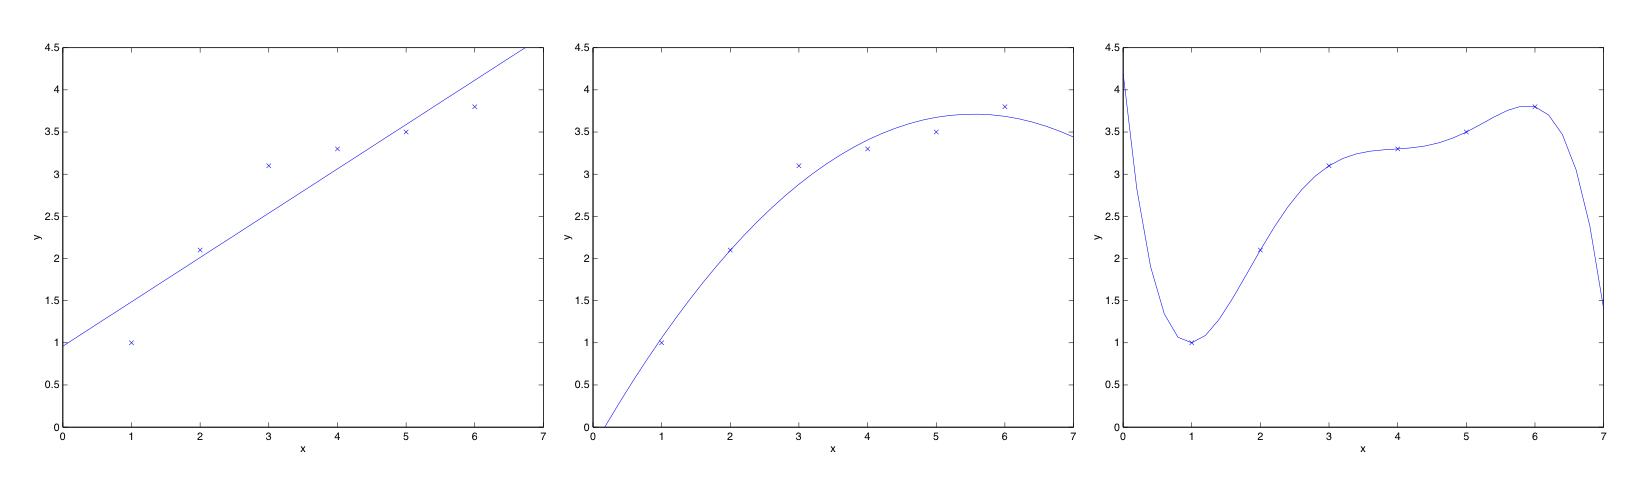

可以看出，找到一个全局的线性模型去拟合整个训练集，并不是一件简单的事情，往往会引起欠拟合或是过拟合的发生。对于这种情况之后会给出解决方案，而这里我们提出了另外一种思路，即 **「局部线性加权回归」**，这种方案可以使特征的选择的重要性降低

#### 4.2 算法思路

局部线性加权回归的思路是并不去拟合整个训练集来产生全局的模型，而是在每次预测时，只去拟合给定输入$x$ 附近的一小段训练集，无论全局训练集是怎样的一条分布曲线，在局部小段数据上，都可以用线性去逼近。具体步骤如下：

1. 拟合$\theta$来最小化$\sum_{i=1}^m w^{(i)}(y^{(i)}-\theta^T x^{(i)})^2$

2. 输出$\theta^T x$

这里$w^{(i)}$是 **「非负权重」**，一般取值如下：

$$w^{(i)}=exp(-\frac{(x^{(i)}-x)^2}{2\tau^2})$$

当$x$ 为向量时表达式有所不同。可以看出，离给定输入越近的样本点权重越大，拟合程度越高。

$w^{(i)}$的定义与高斯分布类似，但并没有关系，分布曲线同为钟型。$\tau$ 称为 **「带宽参数」**，用来控制钟型曲线的顶峰下降速度，即权重变化的快慢，需要根据具体情况作出调整。

#### 4.3 参数学习与非参数学习

局部加权线性回归本质上是一种 **「非参数学习算法」**，而传统的线性回归是一种 **「参数学习算法」**。

两者的区别在于：

* 参数学习算法有一组有限的、固定的参数，一旦完成拟合，只需要保存下参数值做预测，而不需要保存完整的训练集；

* 非参数学习算法由于参数不固定，所以需要保存完整的训练集来进行预测，而不仅仅是保存参数。

「非参数学习」导致的结果：为了表达假设 $h$ 而保存的数据将随着训练集的大小而线性增长。